In [1]:
import time
import os
import random
import csv
import numpy as np
import pandas as pd
from itertools import chain
from pdp_lib import processing as proc
from pdp_lib import util
from GA_lib import GA_multi_depot as GA
from GA_lib import operation_multi_depot as operation
from GA_lib import evaluate_multi_depot as evaluate
from statistics import mode,StatisticsError

# Load file (Use realative path), Create distances and duration tables


In [2]:
start_time = time.time()
# use 'relative path' in filename
filename = 'pdp_instances/LiLim/pdp_100/lrc103.txt'

numVehicles, LoadCapacities, speed, data = proc.load_file(filename)
LOCATIONS = data[0]
DEMANDS = data[1]
timeWindows = data[2]
serviceTimes = data[3]
pickupSiblings = data[4]
deliverySiblings = data[5]
requestType = data[6]
REQUESTS = proc.generate_request(pickupSiblings,deliverySiblings,requestType)
DISTANCES = proc.createDistanceTable(LOCATIONS)
DURATIONS = proc.createDurationTable(LOCATIONS, DISTANCES, serviceTimes, speed)
DEPOTS = proc.create_depots(LOCATIONS)
DISTANCES_FROM_DEPOTS = proc.distances_from_depots(DEPOTS, LOCATIONS)
DISTANCES_TO_DEPOTS = proc.distances_to_depots(DEPOTS, LOCATIONS)
# DEPOT_NUMBERS = proc.simple_assign_depots(REQUESTS, LOCATIONS, DEPOTS, DISTANCES_FROM_DEPOTS, DISTANCES_TO_DEPOTS)
# DEPOT_NUMBERS = proc.worse2worst_assign_depots(REQUESTS, timeWindows,DISTANCES,DURATIONS,DEPOTS,DISTANCES_FROM_DEPOTS, DISTANCES_TO_DEPOTS)
DEPOT_NUMBERS = proc.vote_assign_depots(REQUESTS, timeWindows,DISTANCES,DURATIONS,DEPOTS,DISTANCES_FROM_DEPOTS, DISTANCES_TO_DEPOTS)
REQ_BY_DEPOTS = proc.requests_by_depots(DEPOTS, REQUESTS, DEPOT_NUMBERS)


print(" processing time --- %s seconds ---" % (time.time() - start_time))

 processing time --- 0.11400938034057617 seconds ---


# Simple assigned

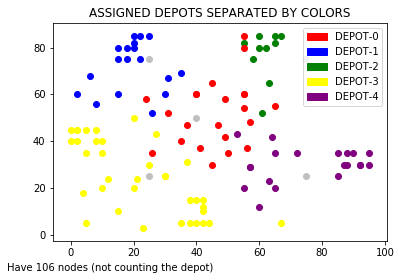

In [7]:
DEPOT_NUMBERS = proc.simple_assign_depots(REQUESTS, LOCATIONS, DEPOTS, DISTANCES_FROM_DEPOTS, DISTANCES_TO_DEPOTS)
util.draw_simple_assigned_depots(REQUESTS,LOCATIONS,DEPOTS,DEPOT_NUMBERS)

# 

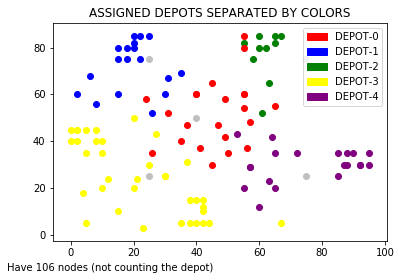

In [12]:
DEPOT_NUMBERS = proc.simple_assign_depots(REQUESTS, LOCATIONS, DEPOTS, DISTANCES_FROM_DEPOTS, DISTANCES_TO_DEPOTS)
util.draw_simple_assigned_depots(REQUESTS,LOCATIONS,DEPOTS,DEPOT_NUMBERS)

# Worse2Worst assigned

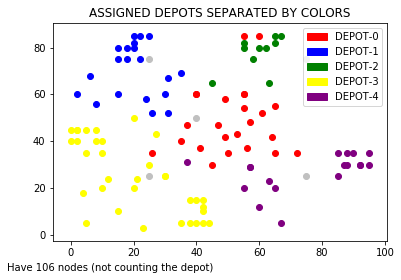

In [31]:
DEPOT_NUMBERS = proc.worse2worst_assign_depots(REQUESTS, timeWindows,DISTANCES,DURATIONS,DEPOTS,DISTANCES_FROM_DEPOTS, DISTANCES_TO_DEPOTS)
util.draw_simple_assigned_depots(REQUESTS,LOCATIONS,DEPOTS,DEPOT_NUMBERS)

# 3-voter assigned

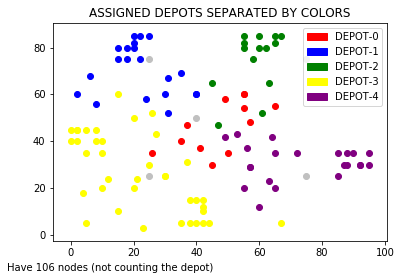

In [37]:
DEPOT_NUMBERS = proc.vote_assign_depots(REQUESTS, timeWindows, DISTANCES, DURATIONS, DEPOTS, DISTANCES_FROM_DEPOTS,DISTANCES_TO_DEPOTS,k=3)
util.draw_simple_assigned_depots(REQUESTS,LOCATIONS,DEPOTS,DEPOT_NUMBERS)

# Final assigned

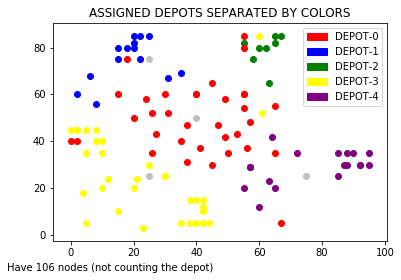

In [19]:
DEPOT_NUMBERS = proc.final_assign_depots(REQUESTS, timeWindows, DISTANCES, DURATIONS, DEPOTS, DISTANCES_FROM_DEPOTS,DISTANCES_TO_DEPOTS,k=3)
util.draw_simple_assigned_depots(REQUESTS,LOCATIONS,DEPOTS,DEPOT_NUMBERS)

# Test Crossover

In [46]:
for idx in REQUESTS:
    req = REQUESTS[idx]
    tw1 = timeWindows[req[0]]
    tw2 = timeWindows[req[1]]
    s = 'req:' + str(req) 
    s += '(' + str(tw1)+')'+'\t\t'
    s += '(' + str(tw2)+')'
    print (s)

req:(1, 3)([0, 191])		([0, 190])
req:(2, 5)([0, 199])		([0, 189])
req:(6, 55)([95, 125])		([140, 170])
req:(7, 46)([0, 194])		([0, 192])
req:(9, 87)([91, 121])		([90, 120])
req:(10, 13)([119, 149])		([142, 172])
req:(12, 17)([0, 197])		([149, 179])
req:(14, 11)([0, 194])		([59, 89])
req:(18, 23)([0, 184])		([65, 95])
req:(20, 48)([0, 194])		([0, 184])
req:(21, 49)([0, 185])		([104, 134])
req:(22, 19)([92, 122])		([0, 189])
req:(25, 24)([154, 184])		([0, 194])
req:(27, 30)([62, 92])		([74, 104])
req:(28, 102)([0, 174])		([0, 174])
req:(29, 34)([0, 177])		([0, 182])
req:(32, 26)([0, 178])		([0, 171])
req:(33, 31)([51, 81])		([0, 179])
req:(36, 37)([43, 73])		([0, 189])
req:(39, 35)([37, 67])		([139, 169])
req:(40, 93)([85, 115])		([178, 208])
req:(41, 72)([92, 122])		([0, 202])
req:(43, 80)([0, 191])		([192, 222])
req:(44, 38)([64, 94])		([75, 105])
req:(45, 8)([37, 67])		([91, 121])
req:(47, 104)([0, 191])		([0, 191])
req:(50, 67)([0, 194])		([70, 100])
req:(51, 63)([0, 196])		([0, 190]

[2, 3, 4, 5, 6]

old Child1 Distances of chromosome: 1510.44127299
[[3, [17, 15, 13, 23, 10, 19], [20, 43, 33, 38, 30, 36, 48, 28, 34, 26, 22, 21]], [1, [7, 5, 22, 29, 34, 18, 1, 9, 3, 4, 11, 6, 2, 50, 14, 51, 28, 49], [13, 7, 3, 5, 96, 95, 98, 65, 42, 55, 54, 53, 56, 40, 62, 35, 37, 27, 29, 10, 8, 19, 15, 11, 93, 16, 14, 12, 97, 9, 6, 4, 99, 2, 23, 102]], [0, [44, 38, 26, 46, 45, 40, 33, 36, 0, 16, 43, 41, 47, 24, 39, 35, 12, 30, 20, 48, 32, 42, 25, 52, 8, 37, 27, 21, 31], [24, 25, 17, 18, 32, 31, 57, 41, 67, 63, 90, 87, 86, 81, 104, 78, 76, 83, 94, 92, 82, 71, 70, 73, 74, 72, 44, 45, 46, 39, 101, 60, 58, 64, 61, 103, 85, 84, 79, 77, 80, 59, 88, 89, 100, 106, 91, 66, 68, 51, 69, 50, 47, 105, 49, 52, 1, 75]]]
old Child2 Distances of chromosome: 1714.63337979


new Child1 Distances of chromosome: 2201.14689951
[[0, [44, 38, 26, 46, 45, 40, 33, 36, 0, 16, 43, 41, 47, 24, 39, 35, 12, 30, 20, 48, 32, 42, 25, 52, 8, 37, 27, 21, 31, 6, 2, 29, 28, 51, 49, 17, 50, 3, 23, 19, 13, 10, 15], [20, 24, 25, 5, 98, 95, 96, 13, 17, 18, 33, 32, 31, 57, 55, 41, 43, 67, 63, 90, 87, 86, 81, 104, 78, 76, 54, 56, 53, 83, 94, 92, 82, 71, 70, 73, 74, 72, 44, 45, 46, 9, 93, 97, 14, 28, 30, 39, 101, 38, 60, 58, 64, 61, 103, 85, 84, 79, 77, 80, 59, 48, 34, 36, 26, 6, 4, 88, 89, 100, 106, 99, 91, 66, 68, 51, 69, 21, 22, 50, 47, 105, 49, 52, 1, 75]], [1, [7, 5, 22, 29, 34, 18, 1, 9, 3, 4, 11, 6, 2, 50, 14, 51, 28, 49, 15, 10], [20, 13, 7, 3, 5, 96, 95, 98, 65, 42, 55, 54, 53, 56, 40, 62, 35, 37, 27, 29, 10, 8, 19, 15, 30, 28, 11, 93, 16, 14, 12, 97, 9, 6, 4, 99, 2, 23, 102, 21]]]
new Child2 Distances of chromosome: 1935.08714528


# Try GA !!!

Populations creation time --- 159.32499623298645 seconds ---


Crossovers time --- 69.95676231384277 seconds ---
Distances of the best chromosome: 1130.05639547
[[2, [7, 4, 5, 9, 10, 18, 14], [20, 7, 8, 19, 15, 27, 29, 35, 37, 30, 11, 16, 12, 2]], [1, [14, 19, 15, 3], [27, 29, 28, 38, 34, 6, 4, 21]], [0, [36, 16, 26, 17, 49, 27, 28, 51, 48, 3, 45, 36, 50, 43, 51, 33, 49, 13], [96, 98, 98, 86, 32, 33, 31, 54, 63, 94, 95, 95, 92, 70, 70, 73, 73, 93, 93, 84, 56, 36, 6, 97, 88, 89, 99, 99, 4, 26, 22, 66, 50, 49, 47, 105]]]
Distances of the worst chromosome: 1609.12289784
[[2, [10, 18, 14, 1, 9, 19], [20, 3, 10, 19, 15, 27, 29, 35, 38, 37, 30, 34]], [0, [16, 24, 28, 21, 11, 32, 20, 17, 12, 47, 26, 46, 52, 27, 43, 29, 15, 49, 36, 5, 38, 8, 40, 35, 33, 50, 0, 13, 42, 23, 45, 41, 51, 3, 25, 4, 30, 44, 31, 22, 39], [24, 25, 17, 18, 32, 33, 31, 43, 42, 41, 67, 90, 98, 87, 86, 81, 104, 78, 76, 83, 95, 96, 8, 7, 63, 54, 55, 57, 53, 56, 44, 40, 74, 84, 82, 70, 71, 73, 77, 85, 93, 97, 11, 61, 103, 58, 60, 45, 46, 28, 36, 39, 101, 26, 6, 51, 48, 59, 64, 66, 80, 

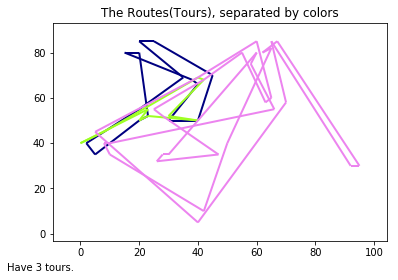

[[2, [7, 4, 5, 9, 10, 18, 14], [20, 7, 8, 19, 15, 27, 29, 35, 37, 30, 11, 16, 12, 2]], [1, [14, 19, 15, 3], [27, 29, 28, 38, 34, 6, 4, 21]], [0, [36, 16, 26, 17, 49, 27, 28, 51, 48, 3, 45, 36, 50, 43, 51, 33, 49, 13], [96, 98, 98, 86, 32, 33, 31, 54, 63, 94, 95, 95, 92, 70, 70, 73, 73, 93, 93, 84, 56, 36, 6, 97, 88, 89, 99, 99, 4, 26, 22, 66, 50, 49, 47, 105]]]


# Try GA with restricted spots!!

Populations creation time --- 3.1801815032958984 seconds ---


Crossovers time --- 19.142090559005737 seconds ---
Distances of the best chromosome: 1869.06741812
[[6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []], [5, [4], [7, 11]], [4, [45], [86, 88]], [3, [23, 38], [43, 74, 64, 48]], [0, [51, 20, 48, 42, 25, 36, 33, 19, 41, 0, 11, 13, 5, 9, 26, 15, 46, 2, 35, 49, 14, 21, 6, 12, 16, 50, 27, 1, 8, 43, 17, 39, 47, 44, 24, 32, 31], [24, 32, 33, 31, 41, 67, 63, 81, 104, 78, 76, 87, 90, 95, 96, 98, 3, 5, 13, 17, 18, 8, 25, 27, 29, 19, 15, 10, 83, 94, 92, 93, 84, 82, 70, 71, 73, 44, 46, 58, 61, 103, 45, 9, 85, 97, 14, 28, 39, 101, 38, 36, 34, 51, 59, 79, 89, 26, 23, 102, 22, 21, 52, 50, 69, 66, 91, 2, 99, 1, 75, 49, 47, 105]], [1, [30, 28, 52, 22, 3, 29, 7, 10, 34], [20, 42, 57, 55, 65, 62, 40, 54, 53, 56, 60, 30, 16, 12, 100, 106, 6, 4]], [2, [

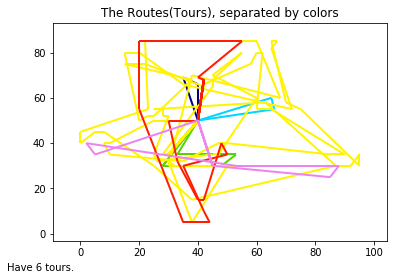

In [10]:
a= [1,2,3,4,5]

[1, 2, 3, 4, 5]